# Import Modul
Pada bagian ini kita akan mengimport semua modul yang akan digunakan dalam proyek kali ini

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Data Loading
Pada bagian ini kita akan mengunduh dataset dari kaggle secara langsung, pada proyek kali ini kita menggunakan dataset penyakit jantung


In [2]:
!kaggle datasets download fedesoriano/heart-failure-prediction
!unzip heart-failure-prediction.zip -d heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 18.0MB/s]
Archive:  heart-failure-prediction.zip
  inflating: heart-failure-prediction/heart.csv  


Dataset yang telah didowload akan dipanggil dan diubah ke bentuk DataFrame dengan bantuan library pandas

In [3]:
df=pd.read_csv('/content/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA
Exploratory data analysis atau sering disingkat EDA merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Menampilkan deskripsi statistik dari DataFrame

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Mengecek DataFrame apakah memiliki data yang terduplikasi

In [6]:
# Cek data duplicated
df.duplicated().sum()

0

Mengecek DataFrame apakah memiliki data yang kosong

In [7]:
# Cek missing value
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Mengecek outlier dari kolom 'Age' dari DataFrame

<Axes: xlabel='Age'>

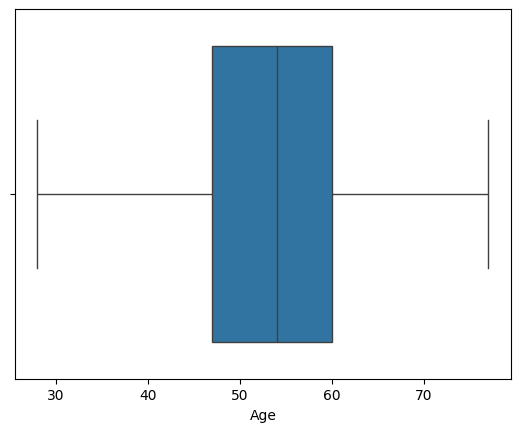

In [8]:
# Cek outlier untuk kolom numerik
sns.boxplot(x=df['Age'])

Mengecek outlier dari kolom 'RestingBP' dari DataFrame



<Axes: xlabel='RestingBP'>

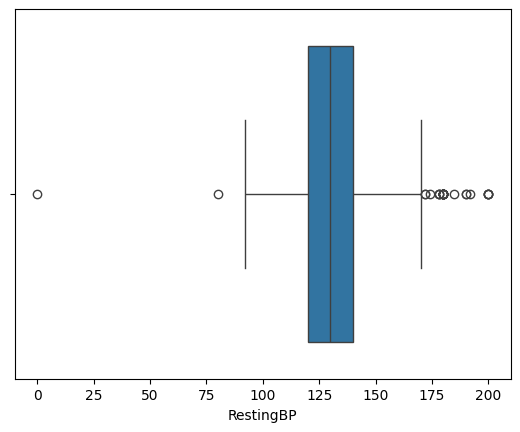

In [9]:
sns.boxplot(x=df['RestingBP'])

Mengecek outlier dari kolom 'Cholesterol' dari DataFrame

<Axes: xlabel='Cholesterol'>

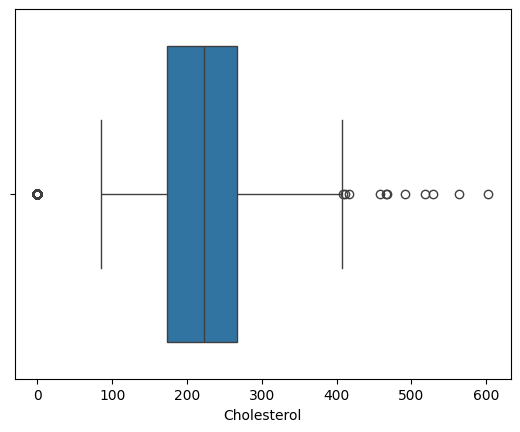

In [10]:
sns.boxplot(x=df['Cholesterol'])

Mengecek outlier dari kolom 'MaxHR' dari DataFrame

<Axes: xlabel='MaxHR'>

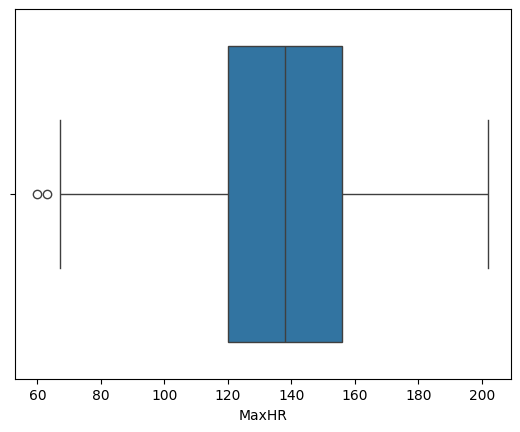

In [11]:
sns.boxplot(x=df['MaxHR'])

Mengecek outlier dari kolom 'Oldpeak' dari DataFrame

<Axes: xlabel='Oldpeak'>

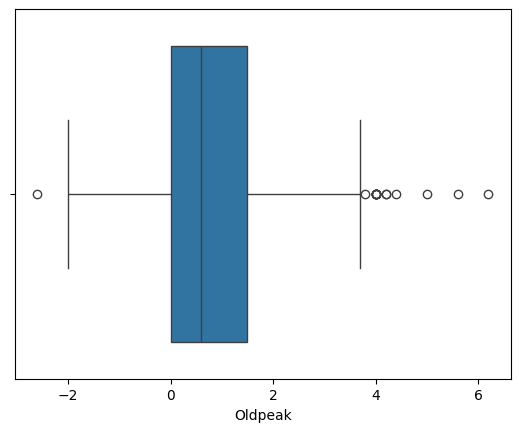

In [12]:
sns.boxplot(x=df['Oldpeak'])

Membuat diagram batang untuk melihat distribusi data pada DataFrame

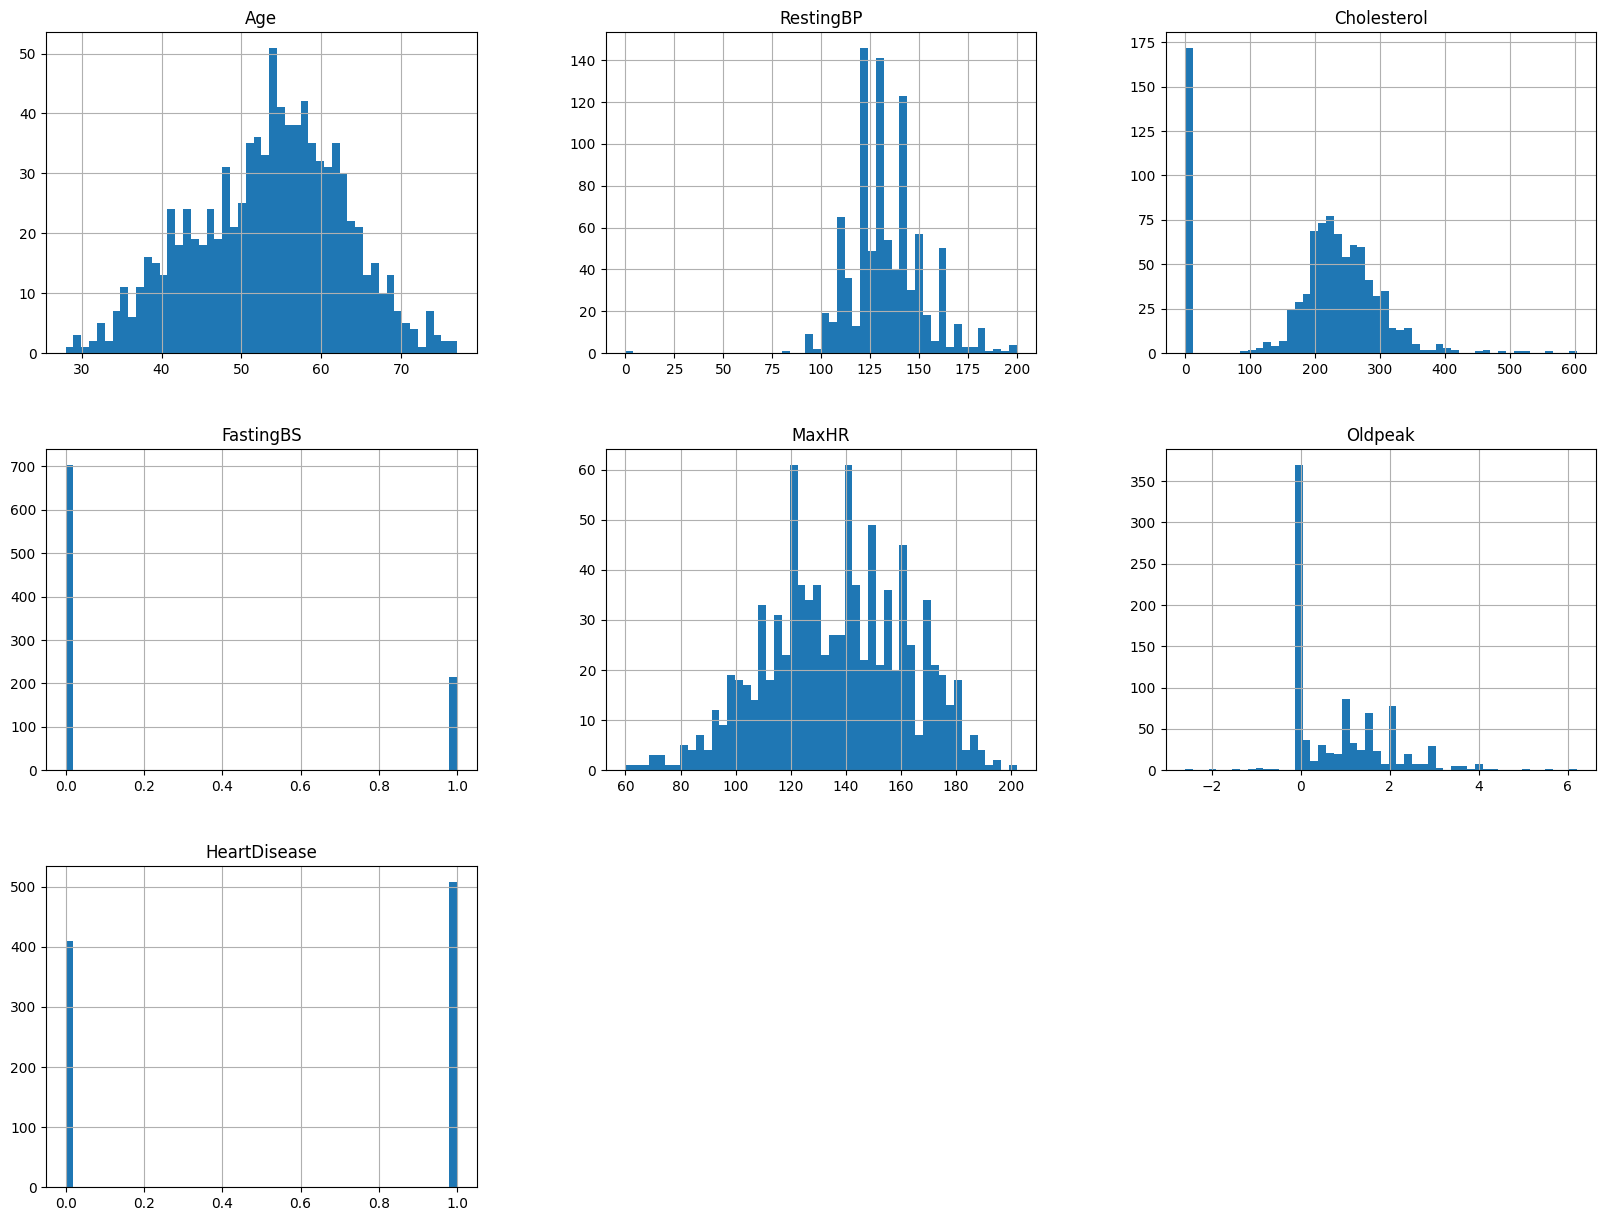

In [13]:
# Melihat sebaran data
df.hist(bins=50, figsize=(20,15))
plt.show()

# Data Preparation
Pada Tahap ini kita akan mempersiapkan (preparation) dataset yang telah didefinikan pada tahap sebelumnya. tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain, seleksi fitur, transformasi data, feature engineering, dan dimensionality reduction.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Proses selanjutnya adalag Encoding fitur katagori. Hal ini berguna pada proses modeling data karena model tidak dapat membaca data non numerik

In [15]:
df = pd.concat([df, pd.get_dummies(df['Sex'],
                                   prefix='Sex',
                                   dtype=int)],axis=1)
df = pd.concat([df, pd.get_dummies(df['ChestPainType'],
                                   prefix='ChestPainType',
                                   dtype=int)],axis=1)
df = pd.concat([df, pd.get_dummies(df['RestingECG'],
                                   prefix='RestingECG',
                                   dtype=int)],axis=1)
df = pd.concat([df, pd.get_dummies(df['ExerciseAngina'],
                                   prefix='ExerciseAngina',
                                   dtype=int)],axis=1)
df = pd.concat([df, pd.get_dummies(df['ST_Slope'],
                                   prefix='ST_Slope',
                                   dtype=int)],axis=1)
df.drop(['Sex',
         'ChestPainType',
         'RestingECG',
         'ExerciseAngina',
         'ST_Slope'], axis=1, inplace=True)
df.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


Melihat tipe data dan jumlah pada DataFrame setelah proses encoding

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    int64  
 8   Sex_M              918 non-null    int64  
 9   ChestPainType_ASY  918 non-null    int64  
 10  ChestPainType_ATA  918 non-null    int64  
 11  ChestPainType_NAP  918 non-null    int64  
 12  ChestPainType_TA   918 non-null    int64  
 13  RestingECG_LVH     918 non-null    int64  
 14  RestingECG_Normal  918 non-null    int64  
 15  RestingECG_ST      918 non-null    int64  
 16  ExerciseAngina_N   918 non

Proses selanjutnya adalah Standarisasi, yaitu proses transformasi data sehinggal memiliki nilai mean = 0 dan standar deviasi = 1

In [17]:
scaler = StandardScaler()
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


Selanjutnya DataFrame di bagi menjadi Test dan Train Set untuk proses pada training data pada model

In [18]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 77)

Cek jumlah data yang berada pada test dan train set

In [19]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 918
Total # of sample in train dataset: 734
Total # of sample in test dataset: 184


# Modeling - ANN
Modeling adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding.

In [44]:
# Menggunakan Deep Learning (Nweron Networ)
model= Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,081 (23.75 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 256 (1.00 KB)

Menetukan optimizer, loss, dan metrics pada proses training. Setelah itu model di training selama 100 epochs

In [45]:
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train,
          y_train,
          epochs=100,
          batch_size=32,
          validation_data=(x_test, y_test))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6204 - loss: 0.7046 - val_accuracy: 0.8152 - val_loss: 0.5461
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7866 - loss: 0.4910 - val_accuracy: 0.8370 - val_loss: 0.4907
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8510 - loss: 0.3688 - val_accuracy: 0.8478 - val_loss: 0.4468
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8630 - loss: 0.3818 - val_accuracy: 0.8641 - val_loss: 0.4226
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8299 - loss: 0.3901 - val_accuracy: 0.8696 - val_loss: 0.3952
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8174 - loss: 0.4043 - val_accuracy: 0.8750 - val_loss: 0.3737
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8527 - loss: 0.3538 - val_accuracy: 0.8804 - val_loss: 0.3499
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8409 - loss: 0.3848 - val_accuracy: 0.8804 - 

Melihat grafik accuracy dan validation accuracy setelah proses training selesai

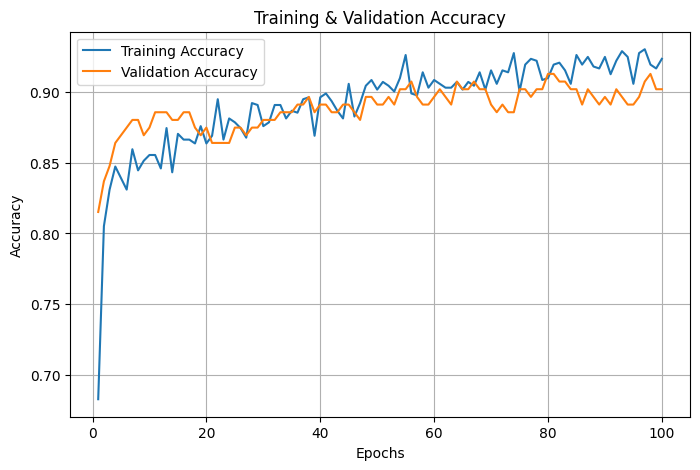

In [46]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(1, len(train_acc) + 1)

# Plot akurasi
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi Model - ANN

Evaluasi model pada metrik Accuracy

In [47]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9012 - loss: 0.4464 
Test Accuracy: 90.22%


Evaluasi model pada metrik recall, F1-Score, dan Precision

In [48]:
# Evaluasi recall, F1-Score, dan Precision
y_pred_prob = model.predict(x_test)
y_pred_classes = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred_classes))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        80
           1       0.92      0.90      0.91       104

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



# Modeling - Logistic Regression

Menggunakan model machine learning (Logistic Regression) untuk memastikan model terbaik

In [41]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

# Evaluasi Model - Logistic Regression
Cek akurasi model Logistic Regression dengan beberapa metrik

In [43]:
y_pred = model.predict(x_test)
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi Model: 0.8858695652173914
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87        80
           1       0.91      0.88      0.90       104

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

